A:INT8, W:INT8-INT4-INT2, ViT, Calibration sample size: 1024, sensitivity set size: 1024 

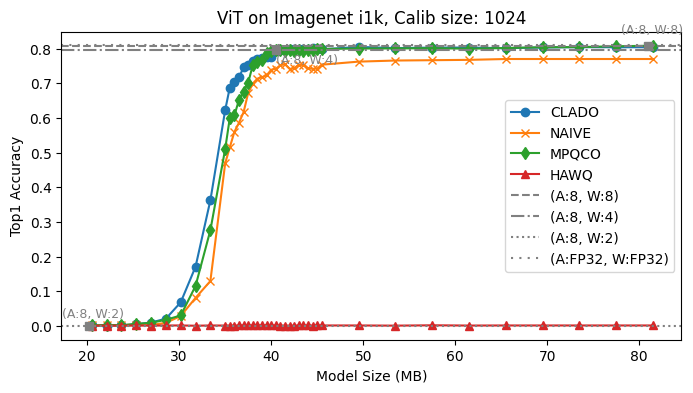

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

size_bounds = np.append(np.linspace(20.5, 35, 10), np.linspace(35.5, 45, 20))
size_bounds = np.append(size_bounds, np.linspace(45.5, 81.5, 10))
n_runs = 1
n_constraints = len(size_bounds)

# n_runs x n_constraints 
clado_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)] 
hawq_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

res_path = "./clado_mpqco_results/results_INT8-INT4-INT2/"
for repeat in range(n_runs):

    #clado
    clado_res = torch.load(res_path + "clado/clado_8_w8-4-2_seed43_eval_results_4096examples.pt")
    for j, item in enumerate(clado_res):
        metrics, modelsize, bitops, mpq_decision = item
        clado_top1[repeat][j] = metrics['acc@1']
        clado_top5[repeat][j] = metrics['acc@5']
        clado_eval_loss[repeat][j] = metrics['loss']
        clado_dec[repeat][j] = mpq_decision
    
    #naive
    naive_res = torch.load(res_path + "naive/naive_8_w8-4-2_seed43_eval_results_4096examples.pt")
    for j, item in enumerate(naive_res):
        metrics, modelsize, bitops, mpq_decision = item
        naive_top1[repeat][j] = metrics['acc@1']
        naive_top5[repeat][j] = metrics['acc@5']
        naive_eval_loss[repeat][j] = metrics['loss']
        naive_dec[repeat][j] = mpq_decision
    
    #mpqco
    mpqco_res = torch.load(res_path + "mpqco/mpqco_8_w8-4-2_seed43_eval_results_4096examples.pt")
    for j, item in enumerate(mpqco_res):
        metrics, modelsize, bitops, mpq_decision = item
        mpqco_top1[repeat][j] = metrics['acc@1']
        mpqco_top5[repeat][j] = metrics['acc@5']
        mpqco_eval_loss[repeat][j] = metrics['loss']
        mpqco_dec[repeat][j] = mpq_decision
    
    #hawq
    hawq_res = torch.load(res_path + "hawq/hawq_8_w8-4-2_seed43_eval_results_4096examples.pt")
    for j, item in enumerate(hawq_res):
        metrics, modelsize, bitops, mpq_decision = item
        hawq_top1[repeat][j] = metrics['acc@1']
        hawq_top5[repeat][j] = metrics['acc@5']
        hawq_eval_loss[repeat][j] = metrics['loss']
        hawq_dec[repeat][j] = mpq_decision
    
# default colors
# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

xs = size_bounds
y_clado =  np.mean(clado_top1, axis=0)
y_naive =  np.mean(naive_top1, axis=0)
y_mpqco =  np.mean(mpqco_top1, axis=0)
y_hawq =  np.mean(hawq_top1, axis=0)

plt.rcParams['figure.figsize'] = (8,4)
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([81.0],[0.808349609375], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (81 - 3.0, 0.808349609375 + 0.036), size=9, color='gray')
plt.axhline(y=0.808349609375, color='gray', linestyle='--', label='(A:8, W:8)')
# model size is:  81.0, {'acc@1': 0.808349609375, 'acc@5': 0.955810546875, 'loss': 0.7368815541267395}


plt.plot([40.5],[0.794677734375], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (40.5, 0.794677734375 -0.038), size=9, color='gray')
plt.axhline(y=0.794677734375, color='gray', linestyle='-.', label='(A:8, W:4)')
# model size is:  40.5, {'acc@1': 0.794677734375, 'acc@5': 0.953125, 'loss': 0.7846826314926147}

plt.plot([20.25],[0.0009765625], color='gray', marker='s')
plt.annotate("(A:8, W:2)", (20.25 - 3.0, 0.0009765625 +0.024,), size=9, color='gray')
plt.axhline(y=0.0009765625, color='gray', linestyle=':', label='(A:8, W:2)')
# model size is:  20.25, {'acc@1': 0.0009765625, 'acc@5': 0.004150390625, 'loss': 7.189114570617676}

plt.axhline(y=0.809326171875, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics:  {'acc@1': 0.809326171875, 'acc@5': 0.956298828125, 'loss': 0.7337556481361389}


plt.title('ViT on Imagenet i1k, Calib size: 1024')
plt.ylabel('Top1 Accuracy')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()


A:INT8, W:INT4-INT3-INT2, ViT, Calibration sample size: 1024, sensitivity set size: 1024, 2048, 10240 

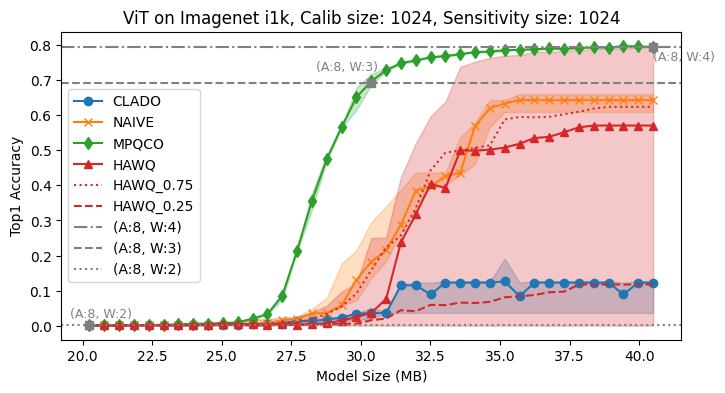

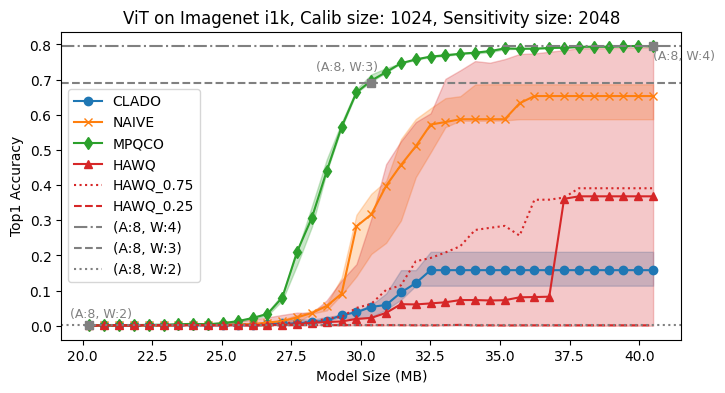

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

size_bounds = np.append(np.linspace(20.25, 29.84210526, 19), np.linspace(30.375, 40.5, 20))
sample_sizes = [1024, 2048]

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for s, sample_size in enumerate(sample_sizes):
    n_runs = 1 if sample_size == 10240 else 5
    n_constraints = len(size_bounds)

    # n_runs x n_constraints 
    clado_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    res_path = "./clado_mpqco_results/results_INT4-INT3-INT2/"
    for repeat in range(n_runs):

        #clado
        clado_res = torch.load(res_path + f"clado/eval_results/sample_size{sample_size}/clado_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(clado_res):
            metrics, modelsize, bitops, mpq_decision = item
            clado_top1[repeat][j] = metrics['acc@1']
            clado_top5[repeat][j] = metrics['acc@5']
            clado_eval_loss[repeat][j] = metrics['loss']
            clado_dec[repeat][j] = mpq_decision
        
        #naive
        naive_res = torch.load(res_path + f"naive/eval_results/sample_size{sample_size}/naive_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(naive_res):
            metrics, modelsize, bitops, mpq_decision = item
            naive_top1[repeat][j] = metrics['acc@1']
            naive_top5[repeat][j] = metrics['acc@5']
            naive_eval_loss[repeat][j] = metrics['loss']
            naive_dec[repeat][j] = mpq_decision

        #mpqco
        mpqco_res = torch.load(res_path + f"mpqco/eval_results/sample_size{sample_size}/mpqco_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(mpqco_res):
            metrics, modelsize, bitops, mpq_decision = item
            mpqco_top1[repeat][j] = metrics['acc@1']
            mpqco_top5[repeat][j] = metrics['acc@5']
            mpqco_eval_loss[repeat][j] = metrics['loss']
            mpqco_dec[repeat][j] = mpq_decision

        #hawq
        hawq_res = torch.load(res_path + f"hawq/eval_results/sample_size{sample_size}/hawq_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(hawq_res):
            metrics, modelsize, bitops, mpq_decision = item
            hawq_top1[repeat][j] = metrics['acc@1']
            hawq_top5[repeat][j] = metrics['acc@5']
            hawq_eval_loss[repeat][j] = metrics['loss']
            hawq_dec[repeat][j] = mpq_decision
        
    # default colors
    # ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    xs = size_bounds
    if n_runs == 5:
        y_clado = np.quantile(clado_top1, 0.5, axis=0)
        y_naive = np.quantile(naive_top1, 0.5, axis=0)
        y_mpqco = np.quantile(mpqco_top1, 0.5, axis=0)
        y_hawq = np.quantile(hawq_top1, 0.5, axis=0)
    else:    
        y_clado = np.mean(clado_top1, axis=0)
        y_naive = np.mean(naive_top1, axis=0)
        y_mpqco = np.mean(mpqco_top1, axis=0)
        y_hawq = np.mean(hawq_top1, axis=0)


    plt.rcParams['figure.figsize'] = (8,4)
    plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
    plt.fill_between(xs, np.quantile(clado_top1, 0.75, axis=0), np.quantile(clado_top1, 0.25, axis=0), alpha=0.25, color='#1f77b4')
    plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
    plt.fill_between(xs, np.quantile(naive_top1, 0.75, axis=0), np.quantile(naive_top1, 0.25, axis=0), alpha=0.25, color='#ff7f0e')
    plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
    plt.fill_between(xs, np.quantile(mpqco_top1, 0.75, axis=0), np.quantile(mpqco_top1, 0.25, axis=0), alpha=0.25, color='#2ca02c')
    plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')
    plt.plot(xs, np.quantile(hawq_top1, 0.75, axis=0), linestyle=':', label=f'HAWQ_0.75', color='#d62728')
    plt.plot(xs, np.quantile(hawq_top1, 0.25, axis=0), linestyle='--', label=f'HAWQ_0.25', color='#d62728')
    plt.fill_between(xs, np.quantile(hawq_top1, 1, axis=0), np.quantile(hawq_top1, 0.0, axis=0), alpha=0.25, color='#d62728')

    plt.plot([40.5],[0.794677734375], color='gray', marker='s')
    plt.annotate("(A:8, W:4)", (40.5, 0.794677734375 -0.038), size=9, color='gray')
    plt.axhline(y=0.794677734375, color='gray', linestyle='-.', label='(A:8, W:4)')
    # model size is: 40.5, {'acc@1': 0.794677734375, 'acc@5': 0.95361328125, 'loss': 0.7845443487167358}

    plt.plot([30.375],[0.691162109375], color='gray', marker='s')
    plt.annotate("(A:8, W:3)", (30.375 - 2, 0.691162109375 + 0.036), size=9, color='gray')
    plt.axhline(y=0.691162109375, color='gray', linestyle='--', label='(A:8, W:3)')
    # model size is: 30.375, {'acc@1': 0.691162109375, 'acc@5': 0.889404296875, 'loss': 1.3180524110794067}

    plt.plot([20.25],[0.0009765625], color='gray', marker='s')
    plt.annotate("(A:8, W:2)", (20.25 - 0.7, 0.0009765625 +0.024,), size=9, color='gray')
    plt.axhline(y=0.0009765625, color='gray', linestyle=':', label='(A:8, W:2)')
    # model size is:  20.25, {'acc@1': 0.0009765625, 'acc@5': 0.004150390625, 'loss': 7.189114570617676}

    #plt.axhline(y=0.809326171875, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
    # fp32 metrics:  {'acc@1': 0.809326171875, 'acc@5': 0.956298828125, 'loss': 0.7337556481361389}


    plt.title(f'ViT on Imagenet i1k, Calib size: 1024, Sensitivity size: {sample_size}')
    plt.ylabel('Top1 Accuracy')
    plt.xlabel('Model Size (MB)')
    plt.legend()
    plt.show()


A:INT8, W:INT4-INT3-INT2, ViT, Calibration sample size: 1024, sensitivity set size: 4k, 6k, 8k, 10k

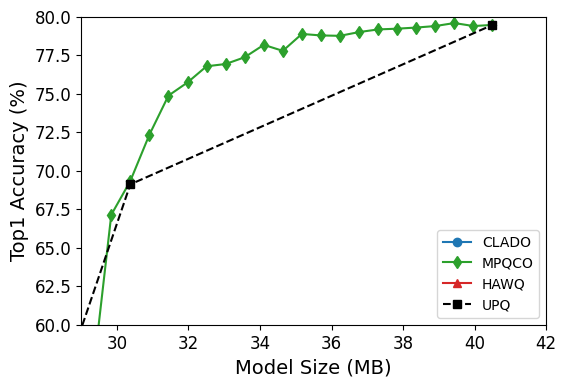

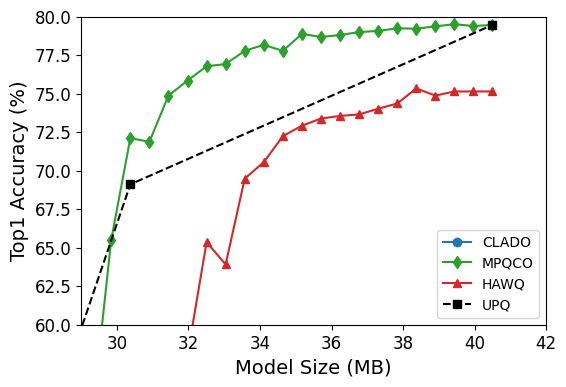

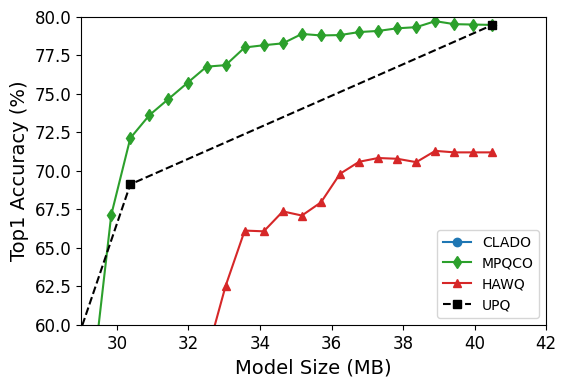

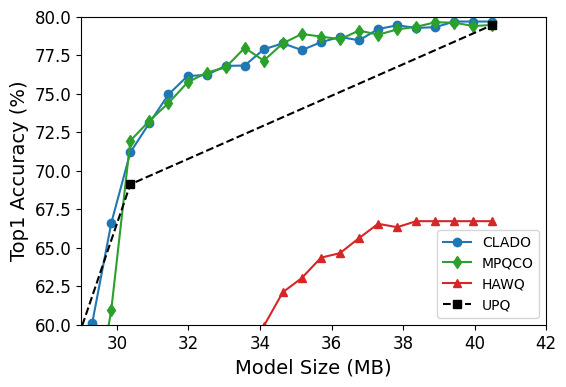

In [27]:
import matplotlib.pyplot as plt
import torch
import numpy as np

size_bounds = np.append(np.linspace(20.25, 29.84210526, 19), np.linspace(30.375, 40.5, 20))
sample_sizes = [1024*4, 1024*6, 1024*8, 1024*10]

for s, sample_size in enumerate(sample_sizes):
    n_runs = 1
    n_constraints = len(size_bounds)

    # n_runs x n_constraints 
    clado_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
    hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

    res_path = "./clado_mpqco_results/results_INT4-INT3-INT2/"
    for repeat in range(n_runs):

        #clado
        clado_res = torch.load(res_path + f"clado/eval_results/sample_size{sample_size}/clado_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(clado_res):
            metrics, modelsize, bitops, mpq_decision = item
            clado_top1[repeat][j] = metrics['acc@1']
            clado_top5[repeat][j] = metrics['acc@5']
            clado_eval_loss[repeat][j] = metrics['loss']
            clado_dec[repeat][j] = mpq_decision
        
        #naive
        naive_res = torch.load(res_path + f"naive/eval_results/sample_size{sample_size}/naive_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(naive_res):
            metrics, modelsize, bitops, mpq_decision = item
            naive_top1[repeat][j] = metrics['acc@1']
            naive_top5[repeat][j] = metrics['acc@5']
            naive_eval_loss[repeat][j] = metrics['loss']
            naive_dec[repeat][j] = mpq_decision

        #mpqco
        mpqco_res = torch.load(res_path + f"mpqco/eval_results/sample_size{sample_size}/mpqco_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(mpqco_res):
            metrics, modelsize, bitops, mpq_decision = item
            mpqco_top1[repeat][j] = metrics['acc@1']
            mpqco_top5[repeat][j] = metrics['acc@5']
            mpqco_eval_loss[repeat][j] = metrics['loss']
            mpqco_dec[repeat][j] = mpq_decision

        #hawq
        hawq_res = torch.load(res_path + f"hawq/eval_results/sample_size{sample_size}/hawq_a8_w4-3-2_seed43_eval_results_4096examples_run{repeat}.pt")
        for j, item in enumerate(hawq_res):
            metrics, modelsize, bitops, mpq_decision = item
            hawq_top1[repeat][j] = metrics['acc@1']
            hawq_top5[repeat][j] = metrics['acc@5']
            hawq_eval_loss[repeat][j] = metrics['loss']
            hawq_dec[repeat][j] = mpq_decision
        
    # default colors
    # ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    xs = size_bounds
    y_clado = np.mean(clado_top1, axis=0)
    y_naive = np.mean(naive_top1, axis=0)
    y_mpqco = np.mean(mpqco_top1, axis=0)
    y_hawq = np.mean(hawq_top1, axis=0)


    plt.rcParams['figure.figsize'] = (6,4)
    plt.plot(xs, y_clado*100, marker='o', label=f'CLADO', color='#1f77b4')
    #plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
    plt.plot(xs, y_mpqco*100, marker='d', label=f'MPQCO', color='#2ca02c')
    plt.plot(xs, y_hawq*100, marker='^', label=f'HAWQ', color='#d62728')

    x_UPQ = [20.25, 30.375, 40.5]
    y_UPQ = [0.09765625, 69.1162109375, 79.4677734375]
    plt.plot(x_UPQ, y_UPQ, marker='s', color="black", label="UPQ", linestyle='--')
    # plt.plot([40.5],[0.794677734375], color='gray', marker='s')
    # plt.annotate("(A:8, W:4)", (40.5, 0.794677734375 -0.038), size=9, color='gray')
    # plt.axhline(y=0.794677734375, color='gray', linestyle='-.', label='(A:8, W:4)')
    # # model size is: 40.5, {'acc@1': 0.794677734375, 'acc@5': 0.95361328125, 'loss': 0.7845443487167358}

    # plt.plot([30.375],[0.691162109375], color='gray', marker='s')
    # plt.annotate("(A:8, W:3)", (30.375 - 2, 0.691162109375 + 0.036), size=9, color='gray')
    # plt.axhline(y=0.691162109375, color='gray', linestyle='--', label='(A:8, W:3)')
    # # model size is: 30.375, {'acc@1': 0.691162109375, 'acc@5': 0.889404296875, 'loss': 1.3180524110794067}

    # plt.plot([20.25],[0.0009765625], color='gray', marker='s')
    # plt.annotate("(A:8, W:2)", (20.25 - 0.7, 0.0009765625 +0.024,), size=9, color='gray')
    # plt.axhline(y=0.0009765625, color='gray', linestyle=':', label='(A:8, W:2)')
    # # model size is:  20.25, {'acc@1': 0.0009765625, 'acc@5': 0.004150390625, 'loss': 7.189114570617676}

    # #plt.axhline(y=0.809326171875, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
    # # fp32 metrics:  {'acc@1': 0.809326171875, 'acc@5': 0.956298828125, 'loss': 0.7337556481361389}


    #plt.title(f'ViT on Imagenet i1k, Calib size: 1024, Sensitivity size: {sample_size}')
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.ylabel('Top1 Accuracy (%)', size=14)
    plt.xlabel('Model Size (MB)', size=14)
    plt.ylim([60,80])
    plt.xlim([29,42])
    plt.legend()
    plt.savefig(f"VIT_{sample_size}.pdf", format="pdf", bbox_inches="tight")
    plt.show()
